   PatientID  Age  Gender       City        Condition  SystolicBP  \
0       1001   69    Male       Pune  General Checkup         150   
1       1002   32    Male   Hubballi     Hypertension         110   
2       1003   89  Female   Hubballi  General Checkup         168   
3       1004   78  Female       Pune         Diabetes         120   
4       1005   38  Female  Bengaluru           Asthma         136   

   DiastolicBP  HeartRate  BloodSugar   BMI   SmokingStatus  \
0          102         88         146  26.6  Current smoker   
1           63         75         157  24.1  Current smoker   
2           81         88          83  23.5  Current smoker   
3           91         56         232  23.9      Non-smoker   
4           74         88          81  32.9   Former smoker   

           HospitalName   VisitDate  TreatmentCost             Outcome  
0  Global Health Center  2024-01-24         3921.0           Recovered  
1       Sunrise Medical  2024-03-22        11952.0          

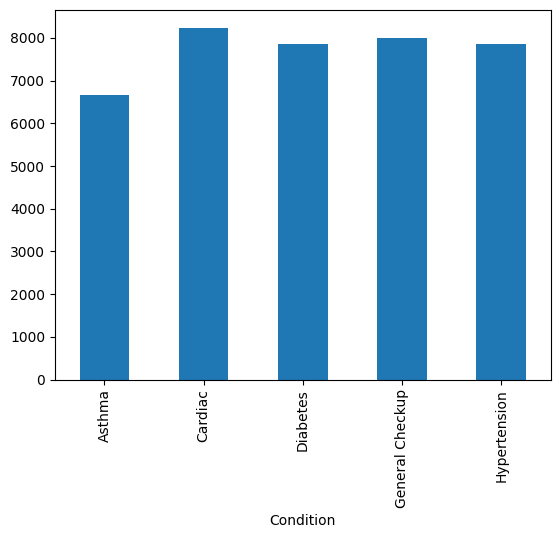

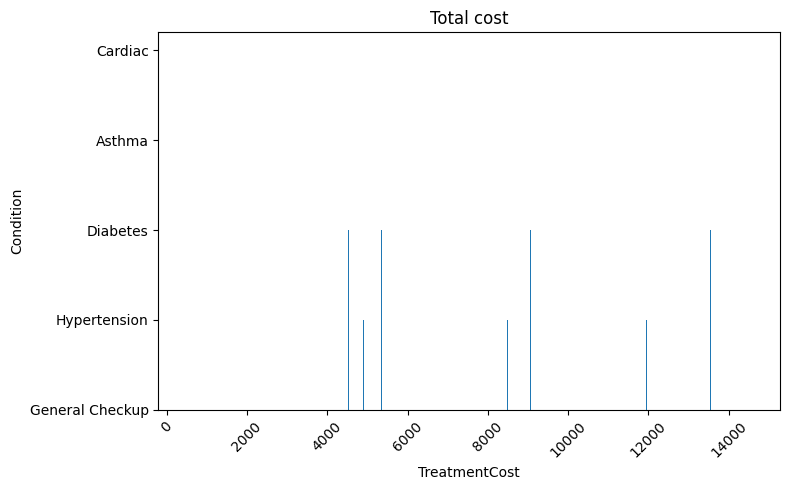

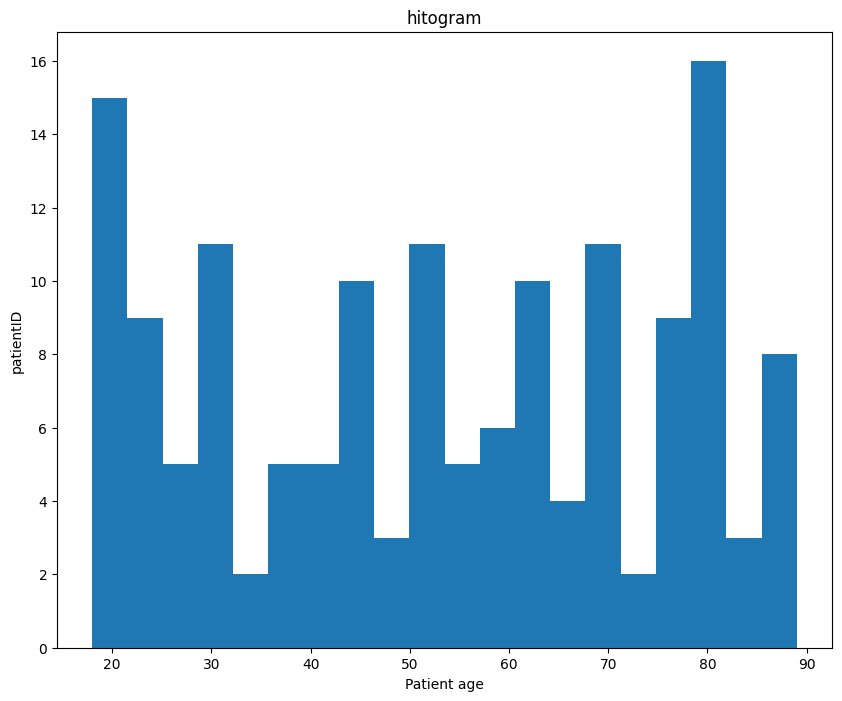

TypeError: boxplot() got an unexpected keyword argument 'column'

<Figure size 800x500 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load data set
de=pd.read_csv("healthcare_patient_visits.csv")
print(de.head())
print(de.describe())
print(de.info())

#handling missing values
print(de.isnull().sum())
print(de.tail())

#replace missing marks with column mean
de.fillna(de.mean(numeric_only=True),inplace=True)
print(de)

print("\n---Average of patientid---")
print(de["PatientID"].mean())

print("\n---- treatement average---")
print(de["TreatmentCost"].mean())

#patient from different cities:
patients=de.sort_values("City",ascending=False).head(5)

city_count=de["City"].value_counts()
print(city_count)

#visualisation
#Treatement cost by condition
avg_cost_by_condition=de.groupby("Condition")["TreatmentCost"].mean()
avg_cost_by_condition.plot(kind='bar')
plt.figure(figsize=(8,5))
plt.bar(de["TreatmentCost"],de["Condition"])
plt.xlabel("TreatmentCost")
plt.ylabel("Condition")
plt.title("Total cost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##histogram
plt.figure(figsize=(10,8))
plt.hist(de["Age"],bins=20)
plt.xlabel("Patient age")
plt.ylabel("patientID")
plt.title("hitogram")
plt.show()

#boxplot
plt.figure(figsize=(8,5))
de.boxplot(column="TreatmentCost",by="SmokingStatus")
plt.title("boxplot")
plt.xlabel("smoking status")
plt.ylabel("treatmentcost")
plt.suptitle("")
plt.show()